In [1]:
import pandas as pd
import numpy as np

In [2]:
# loading the data
df = pd.read_csv("weather_data.csv")

# checking the number of columns
shape=df.shape
print(f"The number of rows: {shape[0]}")
print(f"The number of columns: {shape[1]}")

The number of rows: 19023
The number of columns: 18


In [3]:
# viewing the data
df.head(3)

,id,station_id,latitude,longitude,altitude,light_intensity,UV_index,air_temperature,air_humidity,pressure,wind_speed,peak_wind_gust,wind_direction,rain_guage,rain_accumulation,uplink_time,raw_payload,timestamp
0,67717,101990961244800317,0.470306,34.324694,1455.0,48214.0,3.0,26.8,60.0,87950.0,0.0,2.8,350,0.0,331.470,2025-09-03T13:24:45.074637+03:00,4A010C3C0000BC561E00004B015E00000000225B4C001C...,2025-09-03T13:24:45.158867+03:00
1,67716,101990961244800131,0.384417,0.384417,1329.0,116691.0,9.4,27.1,63.0,87700.0,0.0,3.1,57,0.0,482.600,2025-09-03T13:24:42.673266+03:00,4A010F3F0001C7D35E00004B00390000000022424C001F...,2025-09-03T13:24:42.744163+03:00
2,67715,101990961244800302,0.479778,34.361500,1344.0,91559.0,7.5,26.3,62.0,87800.0,1.2,3.0,242,0.0,352.806,2025-09-03T13:24:30.366157+03:00,4A01073E000165A74B000C4B00F200000000224C4C001E...,2025-09-03T13:24:30.454556+03:00


## Data Understanding

In [4]:
# checking the columns available
df.columns

Index(['id', 'station_id', 'latitude', 'longitude', 'altitude',
       'light_intensity', 'UV_index', 'air_temperature', 'air_humidity',
       'pressure', 'wind_speed', 'peak_wind_gust', 'wind_direction',
       'rain_guage', 'rain_accumulation', 'uplink_time', 'raw_payload',
       'timestamp'],
      dtype='object')

In [5]:
# checking for missing values
df.isnull().sum()

id                   0
station_id           0
latitude             0
longitude            0
altitude             0
light_intensity      0
UV_index             0
air_temperature      0
air_humidity         0
pressure             0
wind_speed           0
peak_wind_gust       0
wind_direction       0
rain_guage           0
rain_accumulation    0
uplink_time          0
raw_payload          0
timestamp            0
dtype: int64

In [6]:
# checking the datatype
df.dtypes

id                     int64
station_id             int64
latitude             float64
longitude            float64
altitude             float64
light_intensity      float64
UV_index             float64
air_temperature      float64
air_humidity         float64
pressure             float64
wind_speed           float64
peak_wind_gust       float64
wind_direction         int64
rain_guage           float64
rain_accumulation    float64
uplink_time           object
raw_payload           object
timestamp             object
dtype: object

In [7]:
# Performing typecasting
# Assuming your DataFrame is called df
df['uplink_time'] = pd.to_datetime(df['uplink_time'], errors='coerce')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Confirming the data type was converted
print(df.dtypes[['uplink_time', 'timestamp']])

print("----"*20)
# Counting how many NaT values after conversion
print("uplink_time NaT count:", df['uplink_time'].isna().sum())
print("timestamp NaT count:", df['timestamp'].isna().sum())


uplink_time    datetime64[ns, UTC+03:00]
timestamp      datetime64[ns, UTC+03:00]
dtype: object
--------------------------------------------------------------------------------
uplink_time NaT count: 0
timestamp NaT count: 0


In [8]:
# Find duplicate rows across the whole DataFrame
duplicates = df[df.duplicated(keep=False)]

# Show how many duplicates you have
print(f"Total duplicate rows: {duplicates.shape[0]}")

# Preview the duplicate rows
duplicates

Total duplicate rows: 14


,id,station_id,latitude,longitude,altitude,light_intensity,UV_index,air_temperature,air_humidity,pressure,wind_speed,peak_wind_gust,wind_direction,rain_guage,rain_accumulation,uplink_time,raw_payload,timestamp
2499,65143,101990961244800184,0.344500,34.336400,1335.0,108523.0,8.4,28.2,52.0,87190.0,1.6,2.3,6,0.000,430.276,2025-09-02 12:51:31.547417+03:00,4A011A340001A7EB5400104B000600000000220F4C0017...,2025-09-02 12:51:31.621448+03:00
2500,65143,101990961244800184,0.344500,34.336400,1335.0,108523.0,8.4,28.2,52.0,87190.0,1.6,2.3,6,0.000,430.276,2025-09-02 12:51:31.547417+03:00,4A011A340001A7EB5400104B000600000000220F4C0017...,2025-09-02 12:51:31.621448+03:00
3299,64326,101990961244800201,0.444917,34.240333,1340.0,0.0,0.0,18.4,86.0,88060.0,0.0,0.0,92,0.000,263.398,2025-09-02 04:26:03.430530+03:00,4A00B856000000000000004B005C0000000022664C0000...,2025-09-02 04:26:03.534312+03:00
3300,64326,101990961244800201,0.444917,34.240333,1340.0,0.0,0.0,18.4,86.0,88060.0,0.0,0.0,92,0.000,263.398,2025-09-02 04:26:03.430530+03:00,4A00B856000000000000004B005C0000000022664C0000...,2025-09-02 04:26:03.534312+03:00
4599,62985,101990961244800389,0.415167,34.285750,1327.0,80528.0,6.9,29.8,42.0,87770.0,2.5,3.2,192,0.000,354.076,2025-09-01 15:44:58.997409+03:00,4A012A2A00013A904500194B00C00000000022494C0020...,2025-09-01 15:44:59.106679+03:00
4600,62985,101990961244800389,0.415167,34.285750,1327.0,80528.0,6.9,29.8,42.0,87770.0,2.5,3.2,192,0.000,354.076,2025-09-01 15:44:58.997409+03:00,4A012A2A00013A904500194B00C00000000022494C0020...,2025-09-01 15:44:59.106679+03:00
4899,62667,202003536241300473,3.168251,38.284759,1455.0,112537.0,8.6,31.0,36.0,94480.0,4.0,11.6,156,0.000,21.336,2025-09-01 13:15:33.607659+03:00,4A0136240001B7995600284B009C0000000024E84C0074...,2025-09-01 13:15:33.711792+03:00
4900,62667,202003536241300473,3.168251,38.284759,1455.0,112537.0,8.6,31.0,36.0,94480.0,4.0,11.6,156,0.000,21.336,2025-09-01 13:15:33.607659+03:00,4A0136240001B7995600284B009C0000000024E84C0074...,2025-09-01 13:15:33.711792+03:00
6199,61356,101990961244800296,-1.310678,36.812921,1234.0,0.0,0.0,22.9,55.0,83660.0,0.0,0.0,128,0.000,344.678,2025-09-01 01:57:11.837723+03:00,4A00E537000000000000004B00800000000020AE4C0000...,2025-09-01 01:57:12.008101+03:00
6200,61356,101990961244800296,-1.310678,36.812921,1234.0,0.0,0.0,22.9,55.0,83660.0,0.0,0.0,128,0.000,344.678,2025-09-01 01:57:11.837723+03:00,4A00E537000000000000004B00800000000020AE4C0000...,2025-09-01 01:57:12.008101+03:00


In [9]:
# Dealing with the dupicate records by retaining the first instance
# Remove duplicates, keep the first occurrence
df = df.drop_duplicates(keep='first')

print(f"Remaining rows after dropping duplicates: {df.shape[0]}")

Remaining rows after dropping duplicates: 19016


In [10]:
# checking how many unique stations we have
df['station_id'].nunique()

28

- The dataset contains 28 unique stations

In [11]:
df['station_id'].unique()

array([101990961244800317, 101990961244800131, 101990961244800302,
       101990961244800113, 101990961244800361, 101990961244800342,
       101990961244800005, 101990961244800061, 101990961244800336,
       202003536241300473, 101990961244800101, 101990961244800222,
       101990961244800083, 101990961244800184, 101990961244800001,
       101990961244800348, 101990961244800102, 101990961244800306,
       101990961244800395, 101990961244800201, 101990961244800389,
       101990961244800246, 101990961244800281, 101990961244800207,
       101990961244800375, 101990961244800393, 101990961244800296,
       101990961244800270])

In [12]:
# Performing mapping
station_ids = [
    101990961244800001, 101990961244800005, 101990961244800061,
    101990961244800083, 101990961244800101, 101990961244800102,
    101990961244800113, 101990961244800131, 101990961244800184,
    101990961244800201, 101990961244800207, 101990961244800222,
    101990961244800246, 101990961244800270, 101990961244800281,
    101990961244800296, 101990961244800302, 101990961244800306,
    101990961244800317, 101990961244800336, 101990961244800342,
    101990961244800348, 101990961244800361, 101990961244800375,
    101990961244800389, 101990961244800393, 101990961244800395,
    202003536241300473
]

# Build dictionary: station_id → station N
station_map = {sid: f"station {i+1}" for i, sid in enumerate(station_ids)}

df["station_id"] = df["station_id"].map(station_map)
df

,id,station_id,latitude,longitude,altitude,light_intensity,UV_index,air_temperature,air_humidity,pressure,wind_speed,peak_wind_gust,wind_direction,rain_guage,rain_accumulation,uplink_time,raw_payload,timestamp
0,67717,station 19,0.470306,34.324694,1455.0,48214.0,3.0,26.8,60.0,87950.0,0.0,2.8,350,0.0,331.470,2025-09-03 13:24:45.074637+03:00,4A010C3C0000BC561E00004B015E00000000225B4C001C...,2025-09-03 13:24:45.158867+03:00
1,67716,station 8,0.384417,0.384417,1329.0,116691.0,9.4,27.1,63.0,87700.0,0.0,3.1,57,0.0,482.600,2025-09-03 13:24:42.673266+03:00,4A010F3F0001C7D35E00004B00390000000022424C001F...,2025-09-03 13:24:42.744163+03:00
2,67715,station 17,0.479778,34.361500,1344.0,91559.0,7.5,26.3,62.0,87800.0,1.2,3.0,242,0.0,352.806,2025-09-03 13:24:30.366157+03:00,4A01073E000165A74B000C4B00F200000000224C4C001E...,2025-09-03 13:24:30.454556+03:00
3,67714,station 8,0.384417,0.384417,1329.0,116691.0,9.4,27.1,63.0,87700.0,0.0,3.1,57,0.0,482.600,2025-09-03 13:24:10.228136+03:00,4A010F3F0001C7D35E00004B00390000000022424C001F...,2025-09-03 13:24:10.281351+03:00
4,67713,station 7,0.317222,34.283333,1333.0,86729.0,6.1,26.5,57.0,87160.0,3.5,3.7,294,0.0,391.160,2025-09-03 13:23:22.550614+03:00,4A010939000152C93D00234B012600000000220C4C0025...,2025-09-03 13:23:22.652735+03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19018,48323,station 3,0.340694,34.333333,1314.0,141512.0,11.8,27.3,49.0,87360.0,0.0,3.2,270,0.0,381.508,2025-08-27 13:32:57.151910+03:00,4A011131000228C87600004B010E0000000022204C0020...,2025-08-27 13:32:57.554471+03:00
19019,48322,station 9,0.344500,34.336400,1335.0,108961.0,8.0,27.4,48.0,87350.0,0.0,1.7,37,0.0,407.924,2025-08-27 13:31:42.241518+03:00,4A0112300001A9A15000004B002500000000221F4C0011...,2025-08-27 13:31:42.940521+03:00
19020,48321,station 15,0.313291,34.265972,1233.0,133408.0,10.6,25.7,57.0,87540.0,0.0,1.2,208,0.0,376.428,2025-08-27 13:31:32.152702+03:00,4A010139000209206A00004B00D00000000022324C000C...,2025-08-27 13:31:32.453055+03:00
19021,48320,station 25,0.415167,34.285750,1327.0,125719.0,10.5,28.5,51.0,88080.0,2.2,3.3,312,0.0,346.202,2025-08-27 13:31:26.196668+03:00,4A011D330001EB176900164B01380000000022684C0021...,2025-08-27 13:31:26.733249+03:00


In [13]:
# Ensure sorted by station and time
df = df.sort_values(by=["station_id", "timestamp"])

# Compute time difference within each station
df["time_diff"] = df.groupby("station_id")["timestamp"].diff()
df

,id,station_id,latitude,longitude,altitude,light_intensity,UV_index,air_temperature,air_humidity,pressure,wind_speed,peak_wind_gust,wind_direction,rain_guage,rain_accumulation,uplink_time,raw_payload,timestamp,time_diff
19008,48334,station 1,0.331768,34.252754,1387.0,37273.0,2.9,27.6,49.0,87550.0,0.8,1.8,204,0.0,318.516,2025-08-27 13:39:03.469996+03:00,4A011431000091991D00084B00CC0000000022334C0012...,2025-08-27 13:39:04.080750+03:00,NaT
18984,48360,station 1,0.331768,34.252754,1387.0,30032.0,2.5,27.1,52.0,87530.0,0.0,1.0,316,0.0,318.516,2025-08-27 13:54:09.314500+03:00,4A010F34000075501900004B013C0000000022314C000A...,2025-08-27 13:54:10.032500+03:00,0 days 00:15:05.951750
18956,48391,station 1,0.331768,34.252754,1387.0,31852.0,2.4,27.1,51.0,87510.0,0.0,1.0,76,0.0,318.516,2025-08-27 14:09:15.726264+03:00,4A010F3300007C6C1800004B004C00000000222F4C000A...,2025-08-27 14:09:17.133825+03:00,0 days 00:15:07.101325
18923,48425,station 1,0.331768,34.252754,1387.0,28067.0,3.4,26.9,54.0,87490.0,0.0,1.0,212,0.0,318.516,2025-08-27 14:24:22.335199+03:00,4A010D3600006DA32200004B00D400000000222D4C000A...,2025-08-27 14:24:22.665273+03:00,0 days 00:15:05.531448
18896,48455,station 1,0.331768,34.252754,1387.0,35734.0,2.0,28.8,47.0,87460.0,0.0,1.7,66,0.0,318.516,2025-08-27 14:39:28.666256+03:00,4A01202F00008B961400004B004200000000222A4C0011...,2025-08-27 14:39:29.059555+03:00,0 days 00:15:06.394282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,67589,station 9,0.344500,34.336400,1335.0,66836.0,5.9,26.0,65.0,87320.0,1.7,3.7,234,0.0,434.086,2025-09-03 12:18:58.658337+03:00,4A010441000105143B00114B00EA00000000221C4C0025...,2025-09-03 12:18:58.753726+03:00,0 days 00:00:15.079698
97,67617,station 9,0.344500,34.336400,1335.0,126476.0,10.4,27.3,61.0,87290.0,1.0,3.0,128,0.0,434.086,2025-09-03 12:34:05.046828+03:00,4A01113D0001EE0C68000A4B00800000000022194C001E...,2025-09-03 12:34:05.168468+03:00,0 days 00:15:06.414742
68,67648,station 9,0.344500,34.336400,1335.0,124828.0,9.2,26.9,62.0,87280.0,1.0,2.7,228,0.0,434.086,2025-09-03 12:49:11.481632+03:00,4A010D3E0001E79C5C000A4B00E40000000022184C001B...,2025-09-03 12:49:11.609516+03:00,0 days 00:15:06.441048
41,67675,station 9,0.344500,34.336400,1335.0,124188.0,9.1,26.6,62.0,87260.0,1.9,2.7,294,0.0,434.086,2025-09-03 13:04:17.927704+03:00,4A010A3E0001E51C5B00134B01260000000022164C001B...,2025-09-03 13:04:18.019927+03:00,0 days 00:15:06.410411


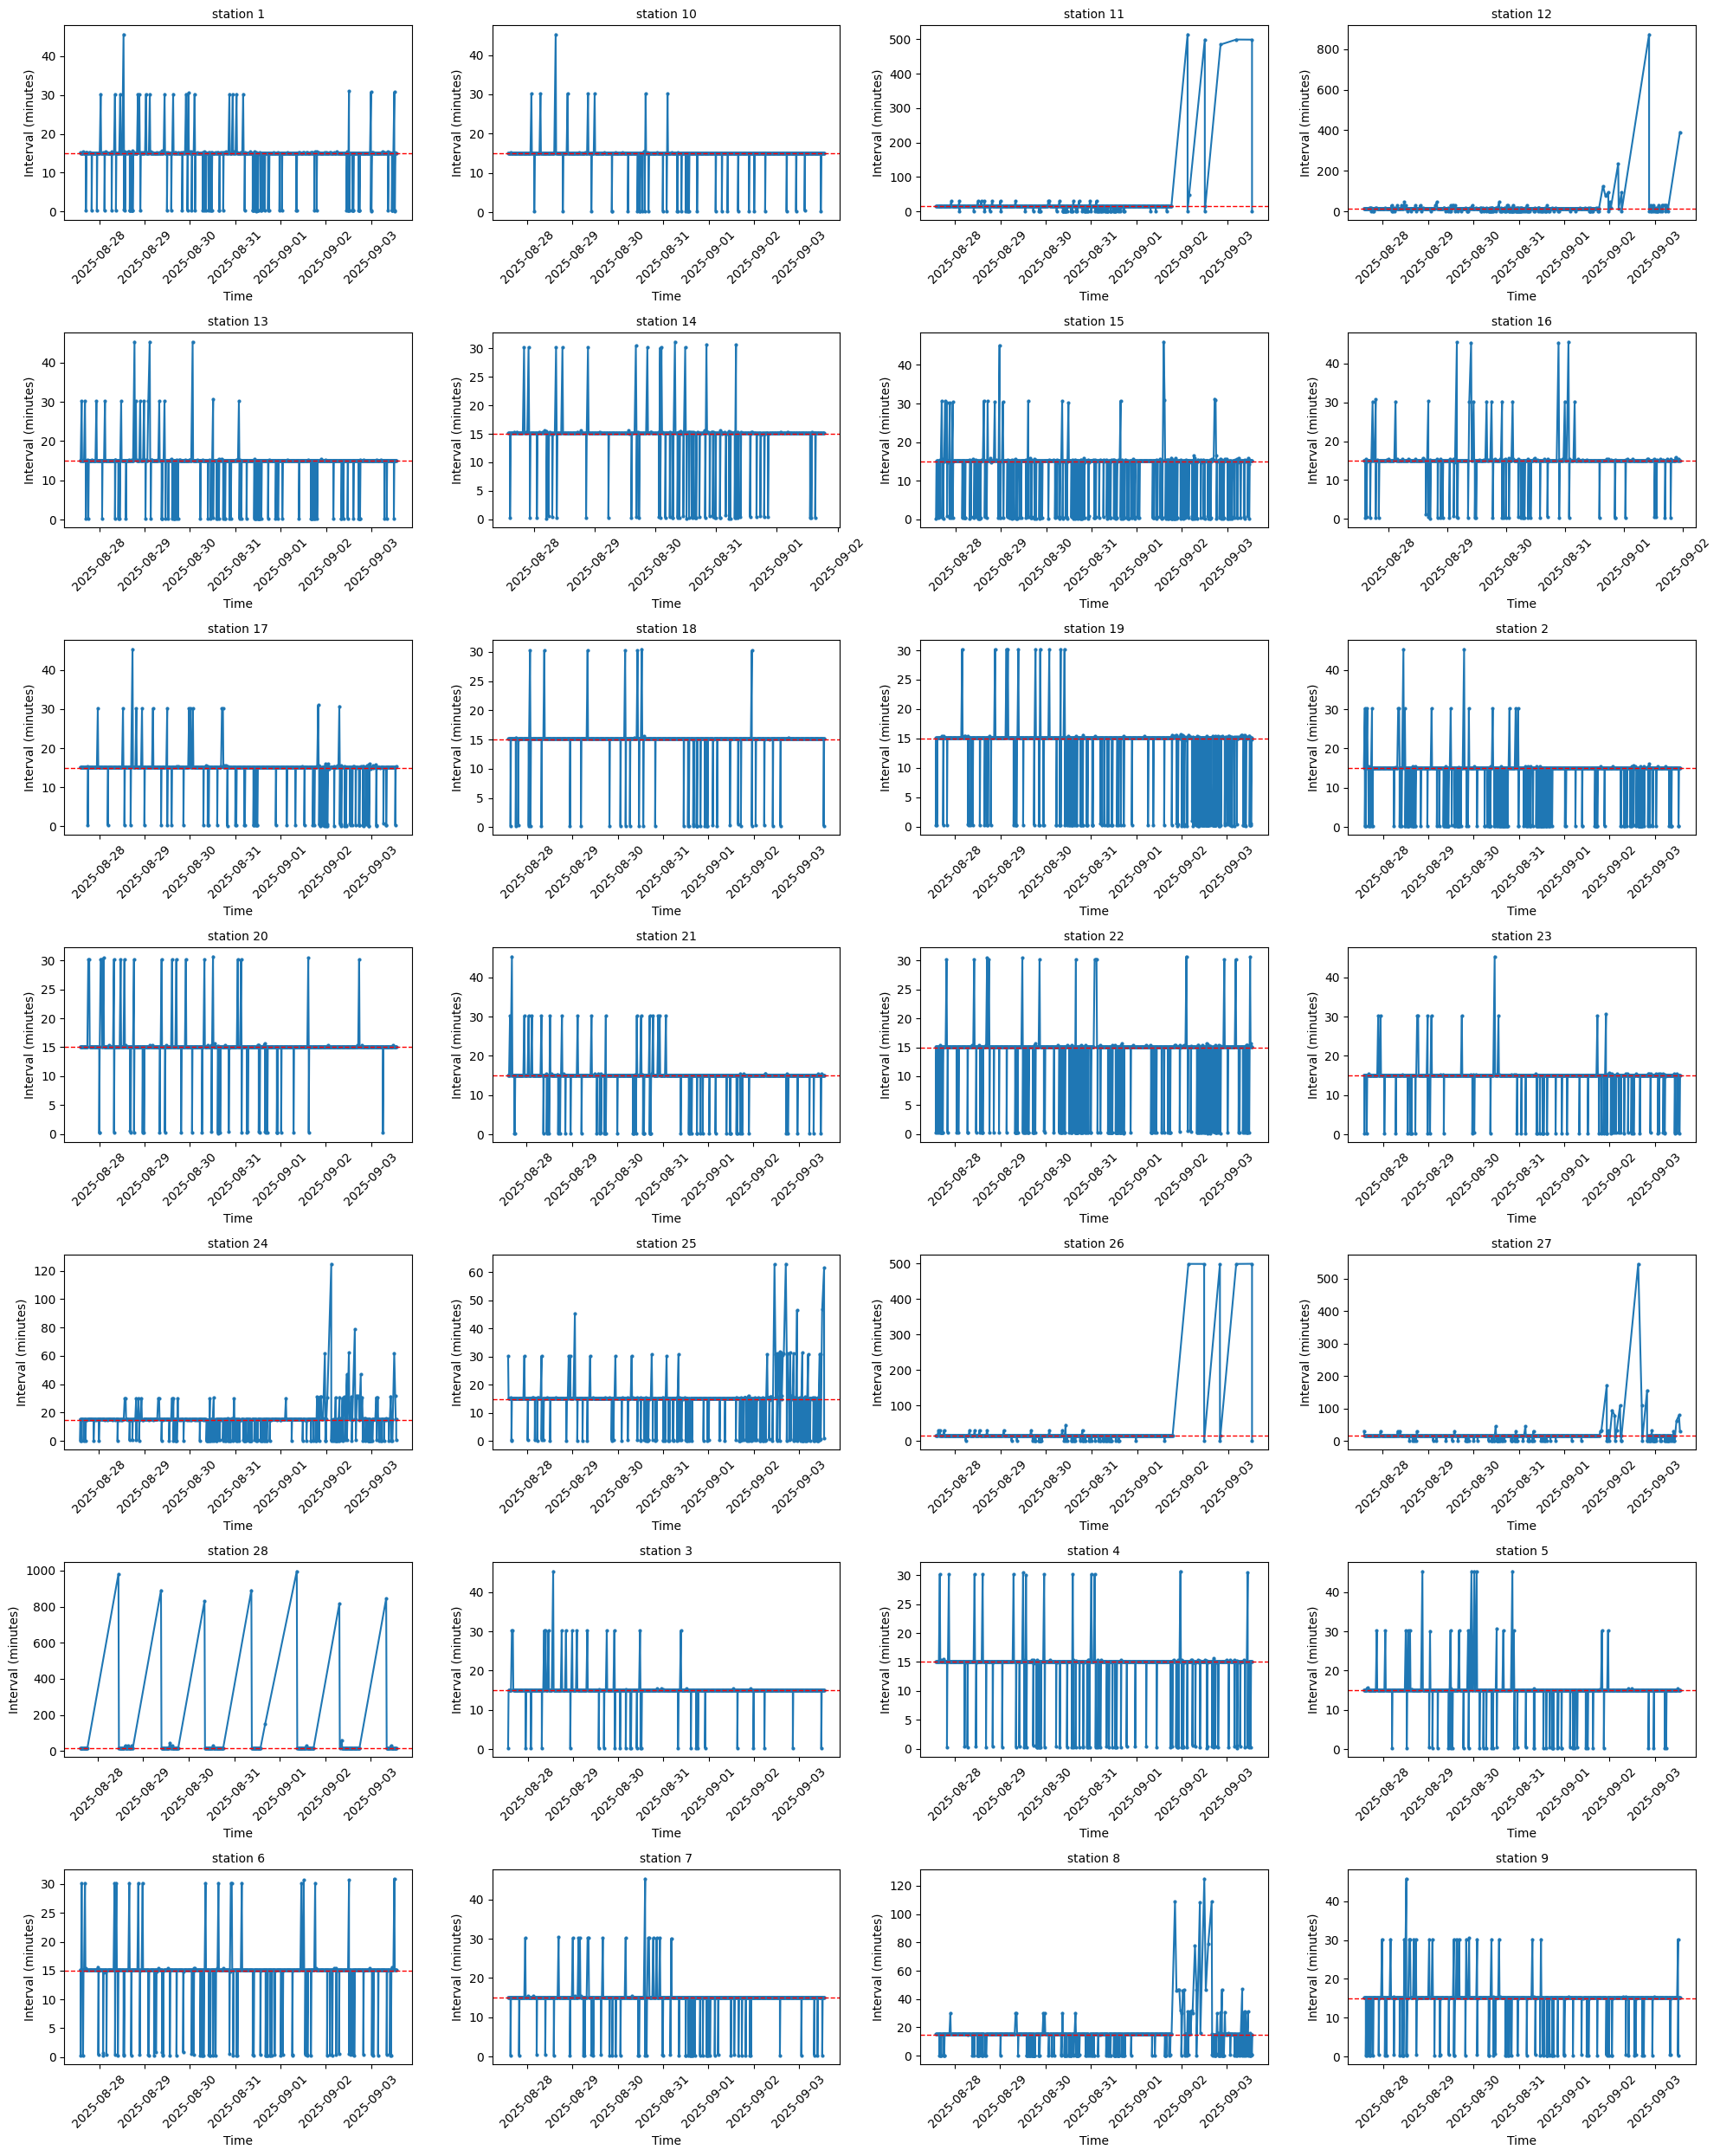

In [14]:
import matplotlib.pyplot as plt

# Convert time_diff to minutes
df["time_diff_minutes"] = df["time_diff"].dt.total_seconds() / 60

# Get unique stations (using mapped labels if available)
stations = df["station_id"].unique()

# Set up subplot grid (7 rows × 4 cols = 28 plots)
fig, axes = plt.subplots(7, 4, figsize=(20, 25), sharex=False, sharey=False)
axes = axes.flatten()

for i, station in enumerate(stations):
    ax = axes[i]
    station_data = df[df["station_id"] == station]
    
    ax.plot(
        station_data["timestamp"].iloc[1:],   # skip first (diff = NaN)
        station_data["time_diff_minutes"].iloc[1:], 
        marker="o", markersize=2, linestyle="-"
    )
    
    ax.axhline(15, color="red", linestyle="--", linewidth=1)  # reference line at 15 min
    ax.set_title(station, fontsize=10)
    ax.set_xlabel("Time")
    ax.set_ylabel("Interval (minutes)")
    ax.tick_params(axis="x", labelrotation=45)

# Hide unused subplots if fewer than 28 stations
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
df.to_csv("weather_data2.csv",index='False')

In [16]:
# Map showing the location of the sensors on the map
